In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
# max of each month for each year
def monthMaxDist(file):
    monthHours = [(0, 744), (744, 1416), (1416, 2160), (2160, 2880), (2880, 3624), (3624, 4344), 
                  (4344, 5088), (5088, 5832), (5832, 6552), (6552, 7296), (7296, 8016), (8016, 8760)]
    df = pd.DataFrame()
    df_region = pd.read_csv(file)
    for year in list(df_region.columns):
        listY = list(df_region[year])
        listM = []
        for s, f in monthHours:
            try:
                maxM = max(listY[s:f])
            except:
                maxM = -1
            listM.append(maxM)
        df[year] = listM
    return df.T

In [9]:
allPlots = [(monthMaxDist('load/' + file), file) for file in os.listdir('load') if not file.startswith('.')]

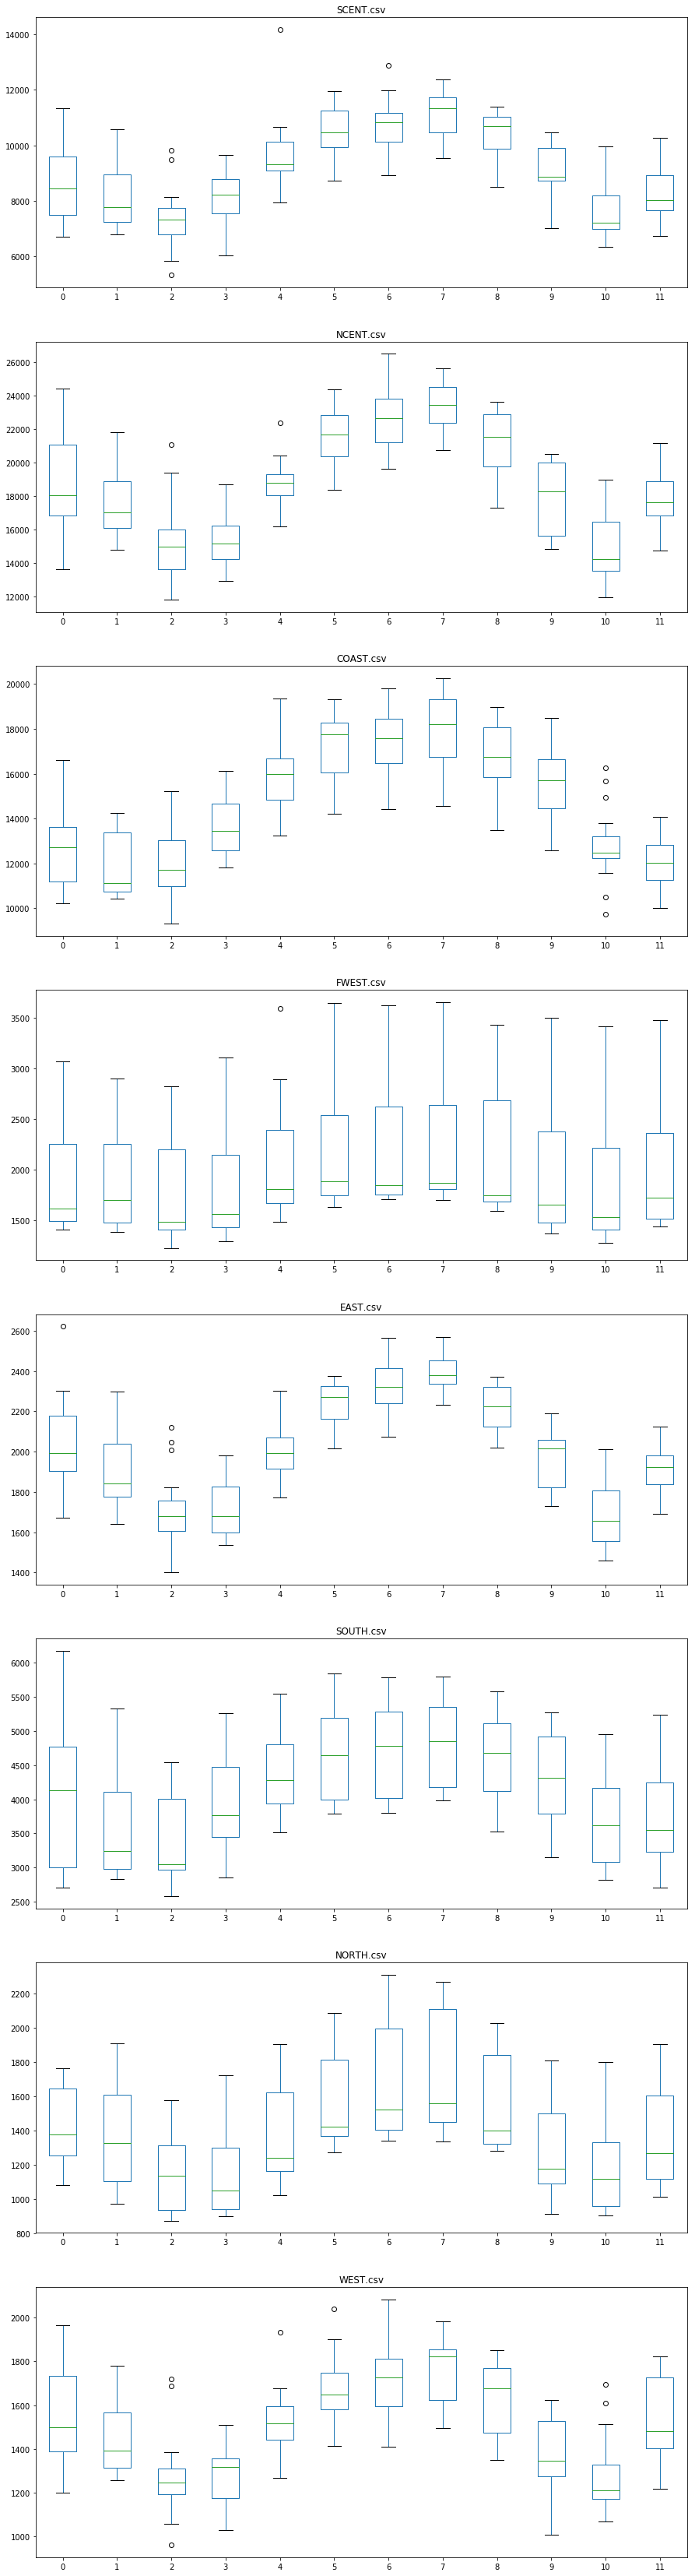

In [10]:
fig, axes = plt.subplots(nrows=8, ncols=1)
for i, (df, t) in enumerate(allPlots):
    df.plot(legend=False, title=t, ax=axes[i], figsize=(15, 60), kind='box')

In [11]:
dfs = [(pd.read_csv('load/' + file), file) for file in os.listdir('load') if not file.startswith('.')]

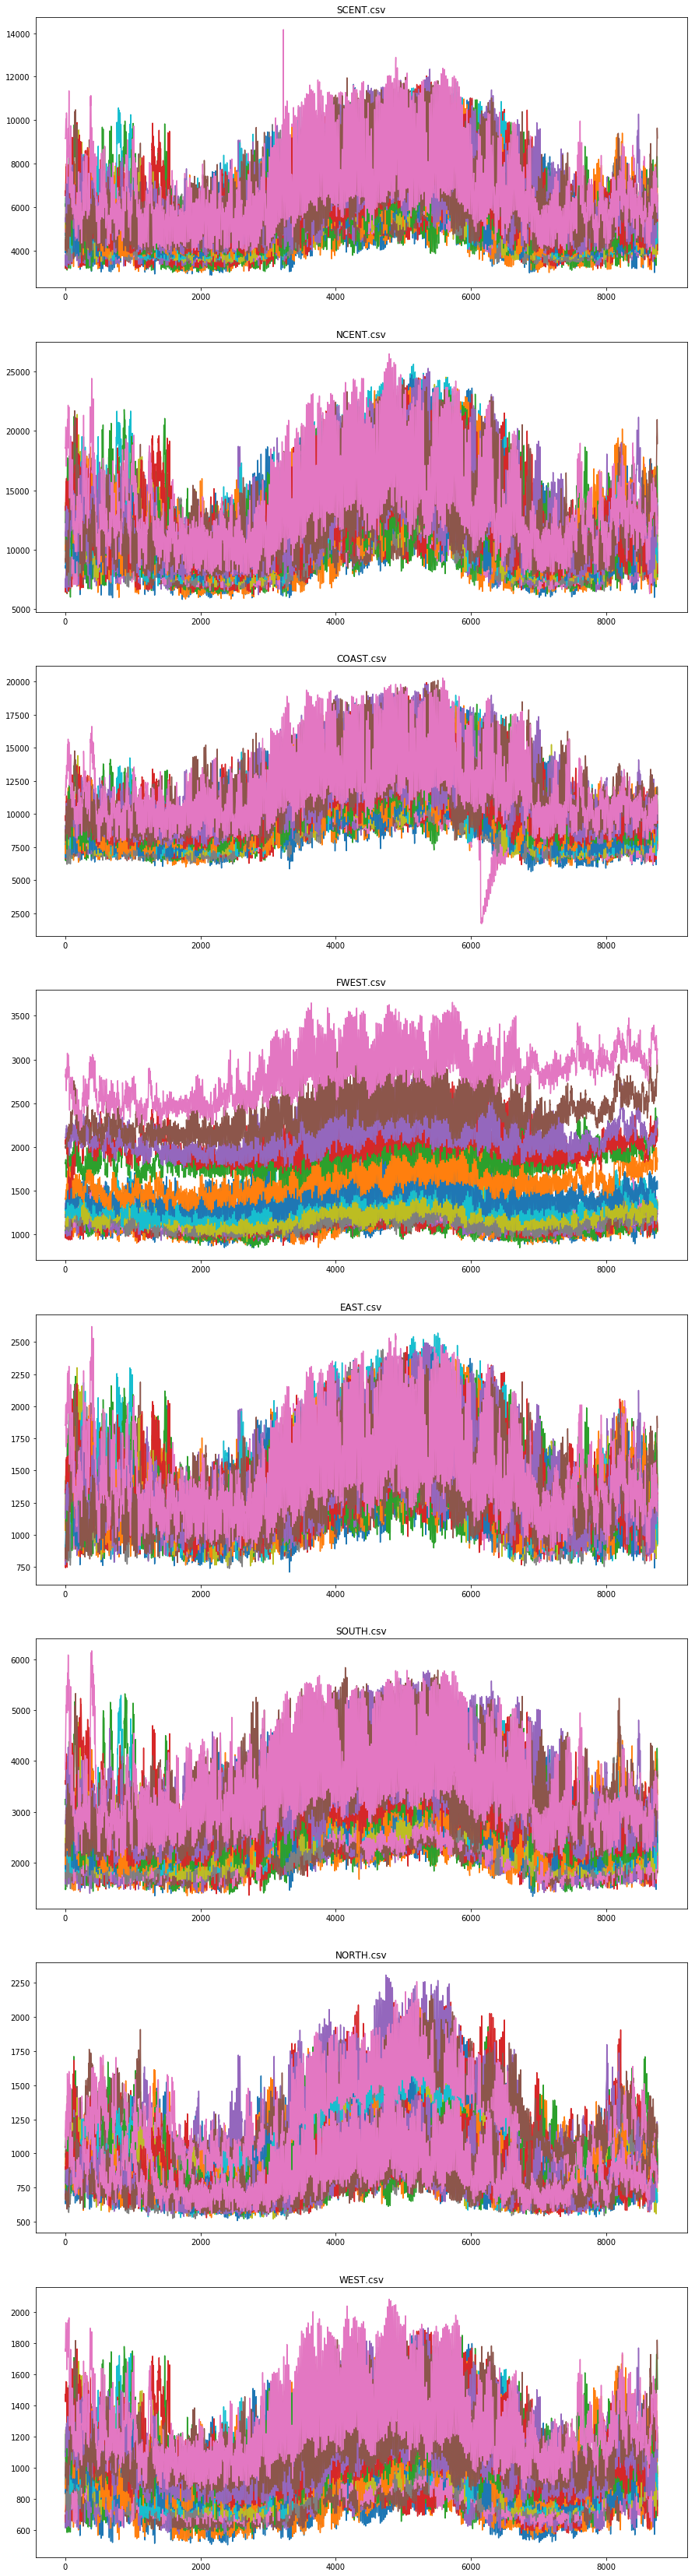

In [12]:
fig, axes = plt.subplots(nrows=8, ncols=1)
for i, (df, t) in enumerate(dfs):
    df.plot(legend=False, title=t, ax=axes[i], figsize=(15, 60))


TypeError: Empty 'DataFrame': no numeric data to plot

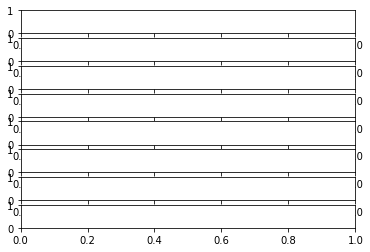

In [13]:
dfs = [(pd.read_csv('weather/' + file), file) for file in os.listdir('weather') if not file.startswith('.')]
dfs = [(df.replace([-9999.0, -9999], 'ffill'), t) for df, t in dfs]
fig, axes = plt.subplots(nrows=8, ncols=1)
for i, (df, t) in enumerate(dfs):
    df.plot(legend=False, title=t, ax=axes[i], figsize=(15, 60))

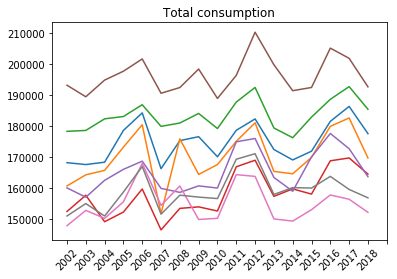

In [118]:

for df, i in dfs:
    m = df
    df.sum().plot(xticks=range(18), rot=45, title='Total consumption')

### Best options are probably NCENT, EAST